## Mercado Libre Tech Challenge Part 1: Exploratory Data Analysis of Lightning Deals

### Objetive: learn outcomes from a lightning deals example dataset.

##### Some guiding qestions
- Are lightning deals useful? Not sufficient data, need sales not in lightning deal regime (put in conclusions).
- What is distribution of deal duration?
- What is the distribution of sales among weekdays and day hours
- What is the distribution of sales among product categories?
- Is there an effect of shipping payment type?

##### Imports & Utils

In [334]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns


def get_dataset_general_features(df: pd.DataFrame) -> None:
    """Prints general info about the given dataset

    Args:
        df (pd.DataFrame): dataset to get general info
    """
    nrows, ncols = df.shape
    print(f"Dataset number of rows: {nrows}")
    print(f"Dataset number of columns: {ncols}\n")
    print("Dataset info:")
    print(f"{df.info()}\n")

    print("Dataset sample:")
    display(df.sample(10, random_state=152))
    

#### Load data

In [335]:
data_path = "../data"
data_file_name = "ofertas_relampago.csv"
data = pd.read_csv(f"{data_path}/{data_file_name}")

#### Dataset formatting and clean up

##### Original dataset general features

In [336]:
get_dataset_general_features(df=data)

Dataset number of rows: 48746
Dataset number of columns: 13

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OFFER_START_DATE           48746 non-null  object 
 1   OFFER_START_DTTM           48746 non-null  object 
 2   OFFER_FINISH_DTTM          48746 non-null  object 
 3   OFFER_TYPE                 48746 non-null  object 
 4   INVOLVED_STOCK             48746 non-null  int64  
 5   REMAINING_STOCK_AFTER_END  48746 non-null  int64  
 6   SOLD_AMOUNT                24579 non-null  float64
 7   SOLD_QUANTITY              24579 non-null  float64
 8   ORIGIN                     11316 non-null  object 
 9   SHIPPING_PAYMENT_TYPE      48746 non-null  object 
 10  DOM_DOMAIN_AGG1            48746 non-null  object 
 11  VERTICAL                   48746 non-null  object 
 12  DOMAIN_ID                  

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
45248,2021-07-26,2021-07-26 13:00:00+00:00,2021-07-26 19:00:06+00:00,lightning_deal,15,15,NaN,NaN,NaN,free_shipping,APPAREL ACCESORIES,APP & SPORTS,MLM-RINGS
40833,2021-06-15,2021-06-15 14:00:00+00:00,2021-06-15 16:08:22+00:00,lightning_deal,14,0,269.60,15.0,A,free_shipping,PHARMACEUTICS,BEAUTY & HEALTH,MLM-SURGICAL_AND_INDUSTRIAL_MASKS
17022,2021-07-24,2021-07-24 13:00:00+00:00,2021-07-24 19:00:04+00:00,lightning_deal,5,4,4.26,1.0,NaN,none,PERSONAL CARE,BEAUTY & HEALTH,MLM-NAIL_POLISH
5980,2021-07-13,2021-07-13 19:00:00+00:00,2021-07-14 01:00:00+00:00,lightning_deal,15,15,NaN,NaN,NaN,free_shipping,APPAREL,APP & SPORTS,MLM-SOCKS
6587,2021-06-16,2021-06-16 07:00:00+00:00,2021-06-16 13:00:03+00:00,lightning_deal,5,4,1.73,1.0,NaN,none,PHARMACEUTICS,BEAUTY & HEALTH,MLM-ESSENTIAL_OILS
37310,2021-07-22,2021-07-22 19:00:00+00:00,2021-07-23 01:00:01+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-SOAP_AND_DETERGENT_DISPENSERS
4618,2021-07-23,2021-07-23 07:00:00+00:00,2021-07-23 07:00:00+00:00,lightning_deal,6,6,NaN,NaN,NaN,none,APPAREL ACCESORIES,APP & SPORTS,MLM-WALLETS
45186,2021-07-26,2021-07-26 19:00:00+00:00,2021-07-27 01:00:06+00:00,lightning_deal,5,4,9.91,1.0,NaN,free_shipping,FOODS,CPG,MLM-MILK
31581,2021-07-25,2021-07-25 18:00:00+00:00,2021-07-26 02:00:00+00:00,lightning_deal,10,6,167.63,4.0,A,free_shipping,ELECTRONICS,CE,MLM-WATER_HEATERS
17837,2021-07-10,2021-07-10 13:00:00+00:00,2021-07-10 19:00:03+00:00,lightning_deal,5,5,7.47,1.0,NaN,free_shipping,STATIONARY,HOME & INDUSTRY,MLM-ADHESIVE_TAPES


##### Observations 1
- The dataset contains 48746 rows and 13 columns
- Columns are:
    - `OFFER_START_DATE`: lightning deal start date
    - `OFFER_START_DTTM`: lightning deal start datetime
    - `OFFER_FINISH_DTTM`: lightning deal end datetime  
    - `OFFER_TYPE`: tag describing the deal (lightning_deal)
    - `INVOLVED_STOCK`: number of stock units accesible to the lightning deal
    - `REMAINING_STOCK_AFTER_END`: number of stock units remaining after the deal ended
    - `SOLD_AMOUNT`: percentage of total inventory sold in lighn (?)
    - `SOLD_QUANTITY`: number of units sold
    - `ORIGIN`: seller (?)
    - `SHIPPING_PAYMENT_TYPE`: shipping payment type
    - `VERTICAL`: product categories level 1
    - `DOM_DOMAIN_AGG1`: product categories level 2
    - `DOMAIN_ID`: product categories level 3
    


- Columns with NaNs:
    - `SOLD_AMOUNT`: 24167 rows
    - `SOLD_QUANTITY`: 24167 rows
    - `ORIGIN`: 37430 rows


In [337]:
# Set some columns lists to facilitate data handling
inventory_cols = ["INVOLVED_STOCK", "REMAINING_STOCK_AFTER_END"]
sales_cols = ["SOLD_AMOUNT", "SOLD_QUANTITY"]
category_cols = ["VERTICAL", "DOM_DOMAIN_AGG1", "DOMAIN_ID"]

In [338]:
# [Optional] Show product categories in dataset. Warning: if show_categories is True over 1200 rows are shown.
show_categories = False
if show_categories:
    with pd.option_context("display.max_rows", 1300):
        display(data[["OFFER_TYPE"] + category_cols].groupby(by=category_cols).count().reset_index().rename(columns={"OFFER_TYPE": "count"}))

In [339]:
#Show product origin in dataset
display(data[["OFFER_TYPE", "ORIGIN"]].groupby(by="ORIGIN").count().reset_index().rename(columns={"OFFER_TYPE": "count"}))
        
#Show product shipping payment types in dataset
display(data[["OFFER_TYPE", "SHIPPING_PAYMENT_TYPE"] ].groupby(by="SHIPPING_PAYMENT_TYPE").count().reset_index().rename(columns={"OFFER_TYPE": "count"}))

,ORIGIN,count
0,A,11316


,SHIPPING_PAYMENT_TYPE,count
0,free_shipping,26658
1,none,22088


##### Observations 2

- The ORIGIN column only has one value: `A` (11316 rows)
- The `SHIPPING_PAYMENT_TYPE` column has has only one value: `free_shipping` (26658 rows, while 22088 are `none`)

##### Questions:
- When `SHIPPING_PAYMENT_TYPE` is `none`, does it mean that shipping costs apply? If that is the case, then those products should show a tendency to have less sales compared to products with `free_shipping`.


##### Formatting
- Several columns have `object` dtype which is non convenient for dataframe manipulations efficiency (searches, filtering, grouping), thus, proper formatting will be applied.
- Column `SHIPPING_PAYMENT_TYPE` contains `none` strng values. To normalize this, `none` values will be set to NaN (consistent with column `ORIGIN`).

In [340]:
data = data.astype(
    {
        'OFFER_START_DATE': np.datetime64, 
        'OFFER_START_DTTM': np.datetime64, 
        'OFFER_FINISH_DTTM': np.datetime64,
        'INVOLVED_STOCK': np.int64, 
        'REMAINING_STOCK_AFTER_END': np.int64,
        'SOLD_AMOUNT': np.float64, 
        'SOLD_QUANTITY': np.float64, 
    }
)
data.loc[data["ORIGIN"].isnull(), "ORIGIN"] = None
data.loc[data["SHIPPING_PAYMENT_TYPE"] == "none", "SHIPPING_PAYMENT_TYPE"] = None

# Check formatting output and example
print("Dataset info:")
print(f"{data.info()}\n")

print("Dataset sample:")
display(data.sample(10, random_state=152))

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   OFFER_START_DATE           48746 non-null  datetime64[ns]
 1   OFFER_START_DTTM           48746 non-null  datetime64[ns]
 2   OFFER_FINISH_DTTM          48746 non-null  datetime64[ns]
 3   OFFER_TYPE                 48746 non-null  object        
 4   INVOLVED_STOCK             48746 non-null  int64         
 5   REMAINING_STOCK_AFTER_END  48746 non-null  int64         
 6   SOLD_AMOUNT                24579 non-null  float64       
 7   SOLD_QUANTITY              24579 non-null  float64       
 8   ORIGIN                     11316 non-null  object        
 9   SHIPPING_PAYMENT_TYPE      26658 non-null  object        
 10  DOM_DOMAIN_AGG1            48746 non-null  object        
 11  VERTICAL                   48746 non-null  object    

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
45248,2021-07-26,2021-07-26 13:00:00,2021-07-26 19:00:06,lightning_deal,15,15,NaN,NaN,None,free_shipping,APPAREL ACCESORIES,APP & SPORTS,MLM-RINGS
40833,2021-06-15,2021-06-15 14:00:00,2021-06-15 16:08:22,lightning_deal,14,0,269.60,15.0,A,free_shipping,PHARMACEUTICS,BEAUTY & HEALTH,MLM-SURGICAL_AND_INDUSTRIAL_MASKS
17022,2021-07-24,2021-07-24 13:00:00,2021-07-24 19:00:04,lightning_deal,5,4,4.26,1.0,None,None,PERSONAL CARE,BEAUTY & HEALTH,MLM-NAIL_POLISH
5980,2021-07-13,2021-07-13 19:00:00,2021-07-14 01:00:00,lightning_deal,15,15,NaN,NaN,None,free_shipping,APPAREL,APP & SPORTS,MLM-SOCKS
6587,2021-06-16,2021-06-16 07:00:00,2021-06-16 13:00:03,lightning_deal,5,4,1.73,1.0,None,None,PHARMACEUTICS,BEAUTY & HEALTH,MLM-ESSENTIAL_OILS
37310,2021-07-22,2021-07-22 19:00:00,2021-07-23 01:00:01,lightning_deal,5,5,NaN,NaN,None,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-SOAP_AND_DETERGENT_DISPENSERS
4618,2021-07-23,2021-07-23 07:00:00,2021-07-23 07:00:00,lightning_deal,6,6,NaN,NaN,None,None,APPAREL ACCESORIES,APP & SPORTS,MLM-WALLETS
45186,2021-07-26,2021-07-26 19:00:00,2021-07-27 01:00:06,lightning_deal,5,4,9.91,1.0,None,free_shipping,FOODS,CPG,MLM-MILK
31581,2021-07-25,2021-07-25 18:00:00,2021-07-26 02:00:00,lightning_deal,10,6,167.63,4.0,A,free_shipping,ELECTRONICS,CE,MLM-WATER_HEATERS
17837,2021-07-10,2021-07-10 13:00:00,2021-07-10 19:00:03,lightning_deal,5,5,7.47,1.0,None,free_shipping,STATIONARY,HOME & INDUSTRY,MLM-ADHESIVE_TAPES


##### Clean up
- Dealing with NaNs.
    - Columns `SOLD_AMOUNT` and `SOLD_QUANTITY` have NaNs possibly indicating that no sales occurred in those cases. This can be confirmed by checking if in those rows `INVOLVED_STOCK` == `REMAINING_STOCK_AFTER_END`. If that is the case, then `SOLD_AMOUNT` and `SOLD_QUANTITY` can be set to zero.
    - Column `ORIGIN` has NaNs and, as per Observations 2, it only consists of the value `A`, thus, this column is not much useful at this stage of EDA and the reason for lack of data and potential impact need be discussed with the client.
- Consistency check.
    - `SOLD_QUANTITY` should coincide with the difference between `INVOLVED_STOCK` and `REMAINING_STOCK_AFTER_END`.
    - If `REMAINING_STOCK_AFTER_END` is lower than zero, it means more units than those allowed for lightning deals were sold. 
    
    **Question to the client**: what's the business procedure here? the extra unit sales are cancelled (i.e. `SOLD_QUANTITY` should be made equal to `INVOLVED_STOCK`)?, or the extra unit sales are allowed (i.e. `INVOLVED_STOCK` should be made equal to `SOLD_QUANTITY`)? 

In [341]:
data.loc[data["INVOLVED_STOCK"] == data["REMAINING_STOCK_AFTER_END"]][["SOLD_AMOUNT", "SOLD_QUANTITY"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23792 entries, 1 to 48745
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SOLD_AMOUNT    213 non-null    float64
 1   SOLD_QUANTITY  213 non-null    float64
dtypes: float64(2)
memory usage: 557.6 KB


In [342]:
# Display inconsistent sales rows
data.loc[
    (data["INVOLVED_STOCK"] == data["REMAINING_STOCK_AFTER_END"]) 
    & ~(data["SOLD_AMOUNT"].isnull())
    & ~(data["SOLD_QUANTITY"].isnull())
    ]

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
394,2021-06-22,2021-06-22 18:00:00,2021-06-23 01:00:01,lightning_deal,40,40,28.46,3.0,A,free_shipping,PERSONAL CARE,BEAUTY & HEALTH,MLM-FACIAL_SKIN_CARE_PRODUCTS
544,2021-06-22,2021-06-22 14:00:00,2021-06-22 22:00:00,lightning_deal,30,30,4.22,1.0,A,None,TOOLS AND CONSTRUCTION,HOME & INDUSTRY,MLM-TOOL_AND_CONSTRUCTION_SUPPLIES
1033,2021-07-08,2021-07-08 07:00:00,2021-07-08 13:00:05,lightning_deal,15,15,5.40,1.0,None,None,ELECTRONICS,CE,MLM-GAME_CONSOLES
1733,2021-07-08,2021-07-08 07:00:00,2021-07-08 13:00:01,lightning_deal,5,5,5.23,1.0,None,free_shipping,ELECTRONICS,CE,MLM-GAME_CONSOLES_VIDEO_GAMES_AND_ARCADE_MACHINES
1860,2021-07-08,2021-07-08 19:00:00,2021-07-09 01:00:01,lightning_deal,15,15,6.03,1.0,None,None,APPAREL,APP & SPORTS,MLM-PAJAMAS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47137,2021-07-06,2021-07-06 13:00:00,2021-07-06 19:00:04,lightning_deal,10,10,4.55,1.0,None,free_shipping,SPORTS,APP & SPORTS,MLM-FOOTBALL_SHIRTS
47167,2021-07-06,2021-07-06 19:00:00,2021-07-07 01:00:05,lightning_deal,15,15,1.33,1.0,None,None,FOODS,CPG,MLM-CHOCOLATES
47189,2021-07-06,2021-07-06 07:00:00,2021-07-06 13:00:01,lightning_deal,15,15,2.53,1.0,None,None,APPAREL ACCESORIES,APP & SPORTS,MLM-NECKLACES
48570,2021-06-19,2021-06-19 19:00:00,2021-06-20 01:00:05,lightning_deal,5,5,5.21,4.0,None,None,SPORTS,APP & SPORTS,MLM-KINESIOLOGY_TAPES


##### Observations 3
213 out of 23792 rows where `INVOLVED_STOCK` == `REMAINING_STOCK_AFTER_END` DO NOT have NaNs in `SOLD_AMOUNT` and `SOLD_QUANTITY`. This appears to be i) an error in the data in terms of not updating `REMAINING_STOCK_AFTER_END` with actual sales, or ii) an error in the reported values in `SOLD_AMOUNT` and `SOLD_QUANTITY`. This needs to be asked to the client. Considering this represents ~0.4% of the data, these rows will NOT be considered in the current analysis, until confirmation of from the client on the source of this inconsistency.

In [343]:
# Drop rows with inconsistent sales.
data.drop(index=data[(data["INVOLVED_STOCK"] == data["REMAINING_STOCK_AFTER_END"]) & ~(data["SOLD_AMOUNT"].isnull()) & ~(data["SOLD_QUANTITY"].isnull())].index, inplace=True)
# Set sales to zero when no change in stock is observed
data.loc[data["INVOLVED_STOCK"] == data["REMAINING_STOCK_AFTER_END"], ("SOLD_AMOUNT", "SOLD_QUANTITY")] = (0, 0)


In [344]:
# Check negative REMAINING_STOCK_AFTER_END
data.loc[data["REMAINING_STOCK_AFTER_END"] < 0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1273 entries, 0 to 48719
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   OFFER_START_DATE           1273 non-null   datetime64[ns]
 1   OFFER_START_DTTM           1273 non-null   datetime64[ns]
 2   OFFER_FINISH_DTTM          1273 non-null   datetime64[ns]
 3   OFFER_TYPE                 1273 non-null   object        
 4   INVOLVED_STOCK             1273 non-null   int64         
 5   REMAINING_STOCK_AFTER_END  1273 non-null   int64         
 6   SOLD_AMOUNT                1241 non-null   float64       
 7   SOLD_QUANTITY              1241 non-null   float64       
 8   ORIGIN                     167 non-null    object        
 9   SHIPPING_PAYMENT_TYPE      184 non-null    object        
 10  DOM_DOMAIN_AGG1            1273 non-null   object        
 11  VERTICAL                   1273 non-null   object        
 12  DOMAI

In [345]:
# Show inconsisten sales rows
data.loc[(data["REMAINING_STOCK_AFTER_END"] < 0) & (data["SOLD_AMOUNT"].isnull()) & (data["SOLD_QUANTITY"].isnull())]

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
8,2021-06-22,2021-06-22 19:00:00,2021-06-22 23:05:32,lightning_deal,10,-1,NaN,NaN,None,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
3399,2021-06-26,2021-06-26 13:00:00,2021-06-26 15:23:17,lightning_deal,5,-1,NaN,NaN,None,None,HOME&DECOR,HOME & INDUSTRY,MLM-DRINKING_GLASSES
4210,2021-07-23,2021-07-23 07:00:00,2021-07-23 10:24:24,lightning_deal,15,-2,NaN,NaN,None,None,COMPUTERS,CE,MLM-SPEAKERS
4219,2021-07-23,2021-07-23 07:00:00,2021-07-23 10:24:24,lightning_deal,15,-2,NaN,NaN,None,None,COMPUTERS,CE,MLM-SPEAKERS
5967,2021-07-13,2021-07-13 19:00:00,2021-07-13 23:57:00,lightning_deal,5,-3,NaN,NaN,None,None,ELECTRONICS,CE,MLM-GAMEPADS_AND_JOYSTICKS
6652,2021-06-16,2021-06-16 07:00:00,2021-06-16 10:19:57,lightning_deal,15,-1,NaN,NaN,None,None,COMPUTERS,CE,MLM-SPEAKERS
6653,2021-06-16,2021-06-16 07:00:00,2021-06-16 10:19:56,lightning_deal,15,-1,NaN,NaN,None,None,COMPUTERS,CE,MLM-SPEAKERS
6656,2021-06-16,2021-06-16 07:00:00,2021-06-16 10:19:56,lightning_deal,15,-1,NaN,NaN,None,None,COMPUTERS,CE,MLM-SPEAKERS
6657,2021-06-16,2021-06-16 07:00:00,2021-06-16 10:19:57,lightning_deal,15,-1,NaN,NaN,None,None,COMPUTERS,CE,MLM-SPEAKERS
6658,2021-06-16,2021-06-16 07:00:00,2021-06-16 10:19:57,lightning_deal,15,-1,NaN,NaN,None,None,COMPUTERS,CE,MLM-SPEAKERS


##### Observations 4
Two types of rows with `REMAINING_STOCK_AFTER_END` < 0 (~2.6% of total rows):
- Consistent: `SOLD_QUANTITY` +  `REMAINING_STOCK_AFTER_END` = `INVOLVED_STOCK`
- Inconsistent: `SOLD_QUANTITY` and `SOLD_AMOUNT` are NaN (~0.07% of total rows)

The inconsistent cases seem to be an i) an error in the values of `REMAINING_STOCK_AFTER_END` (no actual sales occurred) or ii) `SOLD_QUANTITY` and `SOLD_AMOUNT` not being updated. This should be checked with the client. 

Considering that rows with negative `REMAINING_STOCK_AFTER_END` reprensent ~2.6% of total rows in the dataframe, they will be dropped, until confirmation from the client on the reason for these data issue.

In [346]:
# Drop inconsistent sales rows
# data.drop(index=data.loc[(data["REMAINING_STOCK_AFTER_END"] < 0) & (data["SOLD_AMOUNT"].isnull()) & (data["SOLD_QUANTITY"].isnull())].index, inplace=True)
data.drop(index=data.loc[(data["REMAINING_STOCK_AFTER_END"] < 0)].index, inplace=True)

##### Check current dataset features

In [347]:
get_dataset_general_features(df=data)

Dataset number of rows: 47260
Dataset number of columns: 13

Dataset info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 47260 entries, 1 to 48745
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   OFFER_START_DATE           47260 non-null  datetime64[ns]
 1   OFFER_START_DTTM           47260 non-null  datetime64[ns]
 2   OFFER_FINISH_DTTM          47260 non-null  datetime64[ns]
 3   OFFER_TYPE                 47260 non-null  object        
 4   INVOLVED_STOCK             47260 non-null  int64         
 5   REMAINING_STOCK_AFTER_END  47260 non-null  int64         
 6   SOLD_AMOUNT                46704 non-null  float64       
 7   SOLD_QUANTITY              46704 non-null  float64       
 8   ORIGIN                     11121 non-null  object        
 9   SHIPPING_PAYMENT_TYPE      26369 non-null  object        
 10  DOM_DOMAIN_AGG1            47260 non-null  object      

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
18929,2021-07-04,2021-07-04 07:00:00,2021-07-04 13:00:03,lightning_deal,15,15,0.00,0.0,None,None,APPAREL ACCESORIES,APP & SPORTS,MLM-FANNY_PACKS
14893,2021-07-09,2021-07-09 13:00:00,2021-07-09 19:00:05,lightning_deal,15,2,41.03,13.0,None,free_shipping,SPORTS,APP & SPORTS,MLM-RESISTANCE_BANDS
30898,2021-07-11,2021-07-11 13:00:00,2021-07-11 19:00:02,lightning_deal,15,15,0.00,0.0,None,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-OUTDOOR_TABLES
47261,2021-07-06,2021-07-06 13:00:00,2021-07-06 19:00:00,lightning_deal,15,12,5.35,3.0,None,None,STATIONARY,HOME & INDUSTRY,MLM-MARKERS_AND_HIGHLIGHTERS
15916,2021-06-23,2021-06-23 19:00:00,2021-06-24 01:00:00,lightning_deal,5,5,0.00,0.0,None,None,"BOOKS, MULTIMEDIA & OTHER E!",ENTERTAINMENT,MLM-MUSIC_ALBUMS
3663,2021-06-26,2021-06-26 07:00:00,2021-06-26 13:00:00,lightning_deal,15,15,0.00,0.0,None,None,COMPUTERS,CE,MLM-DATA_CABLES_AND_ADAPTERS
26318,2021-06-17,2021-06-17 13:00:00,2021-06-17 13:00:04,lightning_deal,15,15,0.00,0.0,None,free_shipping,FOOTWEAR,APP & SPORTS,MLM-BOOTS_AND_BOOTIES
44099,2021-07-12,2021-07-12 07:00:00,2021-07-12 13:00:02,lightning_deal,10,10,0.00,0.0,None,free_shipping,COMPUTERS,CE,MLM-MICROPHONES
13626,2021-07-19,2021-07-19 13:00:00,2021-07-19 13:00:00,lightning_deal,10,10,0.00,0.0,None,free_shipping,AUTOPARTS,ACC,MLM-VEHICLE_ACCESSORIES
37828,2021-07-22,2021-07-22 13:00:00,2021-07-22 19:00:01,lightning_deal,15,9,6.38,6.0,None,None,TOYS AND GAMES,T & B,MLM-ACTION_FIGURES


In [348]:
data.loc[data["SOLD_AMOUNT"].isnull()]

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
299,2021-06-22,2021-06-22 13:00:00,2021-06-22 19:00:01,lightning_deal,15,7,NaN,NaN,None,free_shipping,ELECTRONICS,CE,MLM-FANS
522,2021-06-22,2021-06-22 13:00:00,2021-06-22 21:00:00,lightning_deal,100,96,NaN,NaN,A,free_shipping,MOBILE,CE,MLM-TABLETS
623,2021-06-22,2021-06-22 07:00:00,2021-06-22 13:00:04,lightning_deal,10,5,NaN,NaN,None,None,COMPUTERS,CE,MLM-MICROPHONES
641,2021-06-22,2021-06-22 19:00:00,2021-06-22 21:22:13,lightning_deal,15,0,NaN,NaN,None,free_shipping,ELECTRONICS,CE,MLM-MEMORY_CARDS
668,2021-06-22,2021-06-22 13:00:00,2021-06-22 19:00:02,lightning_deal,5,3,NaN,NaN,None,free_shipping,INDUSTRY,HOME & INDUSTRY,MLM-OFFICE_CHAIRS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48498,2021-06-19,2021-06-19 13:00:00,2021-06-19 21:00:00,lightning_deal,100,91,NaN,NaN,A,free_shipping,MOBILE,CE,MLM-TABLETS
48586,2021-06-19,2021-06-19 14:00:00,2021-06-19 22:00:00,lightning_deal,30,29,NaN,NaN,A,free_shipping,MOBILE,CE,MLM-CELLPHONES
48610,2021-06-19,2021-06-19 15:00:00,2021-06-19 23:00:00,lightning_deal,25,22,NaN,NaN,A,free_shipping,TOOLS AND CONSTRUCTION,HOME & INDUSTRY,MLM-POWER_GRINDERS
48660,2021-06-19,2021-06-19 15:00:00,2021-06-19 23:00:01,lightning_deal,10,9,NaN,NaN,A,free_shipping,ELECTRONICS,CE,MLM-HAIR_CLIPPERS


##### Observation 5
556 rows contain NaNs in `SOLD_AMOUNT` and `SOLD_QUANTITY` while `INVOLVED_STOCK` is different than `REMAINING_STOCK_AFTER_END`, thus, i) there is an error in the `REMAINING_STOCK_AFTER_END`, or `SOLD_AMOUNT` and `SOLD_QUANTITY` were not updated. This issue occurs in ~1.1% of total rows and will be dropped untils discussing this issue with the client.

In [349]:
data.drop(index=data[(data["INVOLVED_STOCK"] > data["REMAINING_STOCK_AFTER_END"]) & (data["SOLD_AMOUNT"].isnull()) & (data["SOLD_QUANTITY"].isnull())].index, inplace=True)

##### Dataset features after formatting and clean up.

In [350]:
get_dataset_general_features(df=data)

Dataset number of rows: 46704
Dataset number of columns: 13

Dataset info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 46704 entries, 1 to 48745
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   OFFER_START_DATE           46704 non-null  datetime64[ns]
 1   OFFER_START_DTTM           46704 non-null  datetime64[ns]
 2   OFFER_FINISH_DTTM          46704 non-null  datetime64[ns]
 3   OFFER_TYPE                 46704 non-null  object        
 4   INVOLVED_STOCK             46704 non-null  int64         
 5   REMAINING_STOCK_AFTER_END  46704 non-null  int64         
 6   SOLD_AMOUNT                46704 non-null  float64       
 7   SOLD_QUANTITY              46704 non-null  float64       
 8   ORIGIN                     10888 non-null  object        
 9   SHIPPING_PAYMENT_TYPE      25908 non-null  object        
 10  DOM_DOMAIN_AGG1            46704 non-null  object      

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
11665,2021-07-27,2021-07-27 13:00:00,2021-07-27 13:00:02,lightning_deal,15,15,0.00,0.0,None,free_shipping,ELECTRONICS,CE,MLM-GAME_CONSOLES_VIDEO_GAMES_AND_ARCADE_MACHINES
36466,2021-06-11,2021-06-11 13:00:00,2021-06-11 19:00:02,lightning_deal,15,13,5.53,2.0,None,None,PARTY,T & B,MLM-BALLOONS
18328,2021-07-10,2021-07-10 13:00:00,2021-07-10 13:00:01,lightning_deal,5,5,0.00,0.0,None,free_shipping,MOBILE,CE,MLM-MOBILE_DEVICE_CHARGERS
37456,2021-07-22,2021-07-22 13:00:00,2021-07-22 19:00:01,lightning_deal,15,12,4.18,3.0,None,None,APPAREL ACCESORIES,APP & SPORTS,MLM-RINGS
13271,2021-07-19,2021-07-19 19:00:00,2021-07-20 01:00:01,lightning_deal,15,6,25.43,9.0,None,None,SPORTS,APP & SPORTS,MLM-THERMOSES
11251,2021-07-27,2021-07-27 18:00:00,2021-07-28 01:00:01,lightning_deal,6,6,0.00,0.0,A,None,PERSONAL CARE,BEAUTY & HEALTH,MLM-BEAUTY_AND_PERSONAL_CARE_SUPPLIES
42044,2021-06-05,2021-06-05 07:00:00,2021-06-05 13:00:02,lightning_deal,15,15,0.00,0.0,None,None,PERSONAL CARE,BEAUTY & HEALTH,MLM-NAIL_POLISH
23907,2021-07-31,2021-07-31 19:00:00,2021-08-01 01:00:01,lightning_deal,5,3,2.54,2.0,None,None,COMPUTERS,CE,MLM-NETWORK_CABLES
46573,2021-07-16,2021-07-16 14:00:00,2021-07-16 22:00:01,lightning_deal,20,18,27.12,2.0,A,free_shipping,ELECTRONICS,CE,MLM-PORTABLE_DVD_PLAYERS
36061,2021-06-11,2021-06-11 13:00:00,2021-06-11 19:00:01,lightning_deal,15,13,11.11,2.0,None,free_shipping,APPAREL,APP & SPORTS,MLM-BLOUSES


#### Dataset Analysis

##### Deal durations

In [351]:
data["OFFER_DURATION_MINUTES"] = (data["OFFER_FINISH_DTTM"] - data["OFFER_START_DTTM"]).astype('timedelta64[m]')
data["OFFER_DURATION_HOURS"] = (data["OFFER_FINISH_DTTM"] - data["OFFER_START_DTTM"]).astype('timedelta64[h]')
data["OFFER_START_WEEKDAY"] = data["OFFER_START_DTTM"].dt.weekday
data["OFFER_START_MONTH"] = data["OFFER_START_DTTM"].dt.month
data["OFFER_START_DAY"] = data["OFFER_START_DTTM"].dt.day
data["OFFER_START_YEAR"] = data["OFFER_START_DTTM"].dt.year

In [352]:
data

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,OFFER_DURATION_MINUTES,OFFER_DURATION_HOURS,OFFER_START_WEEKDAY,OFFER_START_MONTH,OFFER_START_DAY,OFFER_START_YEAR
1,2021-06-22,2021-06-22 13:00:00,2021-06-22 19:00:02,lightning_deal,5,5,0.00,0.0,None,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS,360.0,6.0,1,6,22,2021
2,2021-06-22,2021-06-22 07:00:00,2021-06-22 13:00:01,lightning_deal,15,12,10.73,3.0,None,None,COMPUTERS,CE,MLM-SPEAKERS,360.0,6.0,1,6,22,2021
3,2021-06-22,2021-06-22 19:00:00,2021-06-23 01:36:12,lightning_deal,15,13,7.03,2.0,None,None,COMPUTERS,CE,MLM-HEADPHONES,396.0,6.0,1,6,22,2021
4,2021-06-22,2021-06-22 13:00:00,2021-06-22 15:48:12,lightning_deal,15,0,39.65,15.0,None,None,COMPUTERS,CE,MLM-HEADPHONES,168.0,2.0,1,6,22,2021
5,2021-06-22,2021-06-22 18:00:00,2021-06-23 01:00:12,lightning_deal,23,23,0.00,0.0,A,free_shipping,COMPUTERS,CE,MLM-HEADPHONES,420.0,7.0,1,6,22,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48741,2021-06-19,2021-06-19 13:00:00,2021-06-19 19:00:01,lightning_deal,15,9,16.28,6.0,None,None,HOME&DECOR,HOME & INDUSTRY,MLM-CHRISTMAS_LIGHTS,360.0,6.0,5,6,19,2021
48742,2021-06-19,2021-06-19 13:00:00,2021-06-19 19:00:01,lightning_deal,5,5,0.00,0.0,None,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-DECORATIVE_PAINTINGS,360.0,6.0,5,6,19,2021
48743,2021-06-19,2021-06-19 07:00:00,2021-06-19 13:00:03,lightning_deal,5,3,16.62,2.0,None,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS,360.0,6.0,5,6,19,2021
48744,2021-06-19,2021-06-19 13:00:00,2021-06-19 19:00:00,lightning_deal,5,1,38.79,4.0,None,free_shipping,HOME&DECOR,HOME & INDUSTRY,MLM-INDOOR_CURTAINS_AND_BLINDS,360.0,6.0,5,6,19,2021


In [353]:
# Get years, months and weekdays of available lightning deals
print(f"Deals years: {np.sort(data['OFFER_START_YEAR'].unique())}")
print(f"Deals months: {np.sort(data['OFFER_START_MONTH'].unique())}")
print(f"Deals weekdays: {np.sort(data['OFFER_START_WEEKDAY'].unique())}")
print(f"Deals month days: {np.sort(data['OFFER_START_DAY'].unique())}")

Deals years: [2021]
Deals months: [6 7]
Deals weekdays: [0 1 2 3 4 5 6]
Deals month days: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


In [367]:
# Get distribution of deal durations
print("Duration distribution")
display(
    data[["OFFER_DURATION_HOURS", "OFFER_DURATION_MINUTES"]]
    .groupby(by="OFFER_DURATION_HOURS")
    .agg(
        {
            "OFFER_DURATION_MINUTES": ["count", "min", "mean", "max"]
        }
    )
    .reset_index()
)

Duration distribution


OFFER_DURATION_HOURS OFFER_DURATION_MINUTES                             
                                         count     min         mean     max
0                   0.0                    116    16.0    40.715517    59.0
1                   1.0                    300    60.0    90.266667   119.0
2                   2.0                    449   120.0   148.848552   179.0
3                   3.0                    509   180.0   210.489194   239.0
4                   4.0                    681   240.0   269.734214   299.0
5                   5.0                   1132   300.0   320.729682   359.0
6                   6.0                  29998   360.0   360.593006   419.0
7                   7.0                   1975   420.0   420.745823   477.0
8                   8.0                   7492   480.0   480.376268   536.0
9                   9.0                      3   541.0   543.000000   546.0
10                 10.0                      4   616.0   626.000000   655.0
11                 11.0                      4   661.0   697.000000   716.0
12                 12.0                    152   721.0   721.486842   722.0
13                 14.0                      3   877.0   878.000000   880.0
14                 15.0                      1   937.0   937.000000   937.0
15                104.0                      1  6285.0  6285.000000  6285.0

<AxesSubplot: xlabel='OFFER_DURATION_MINUTES', ylabel='Count'>

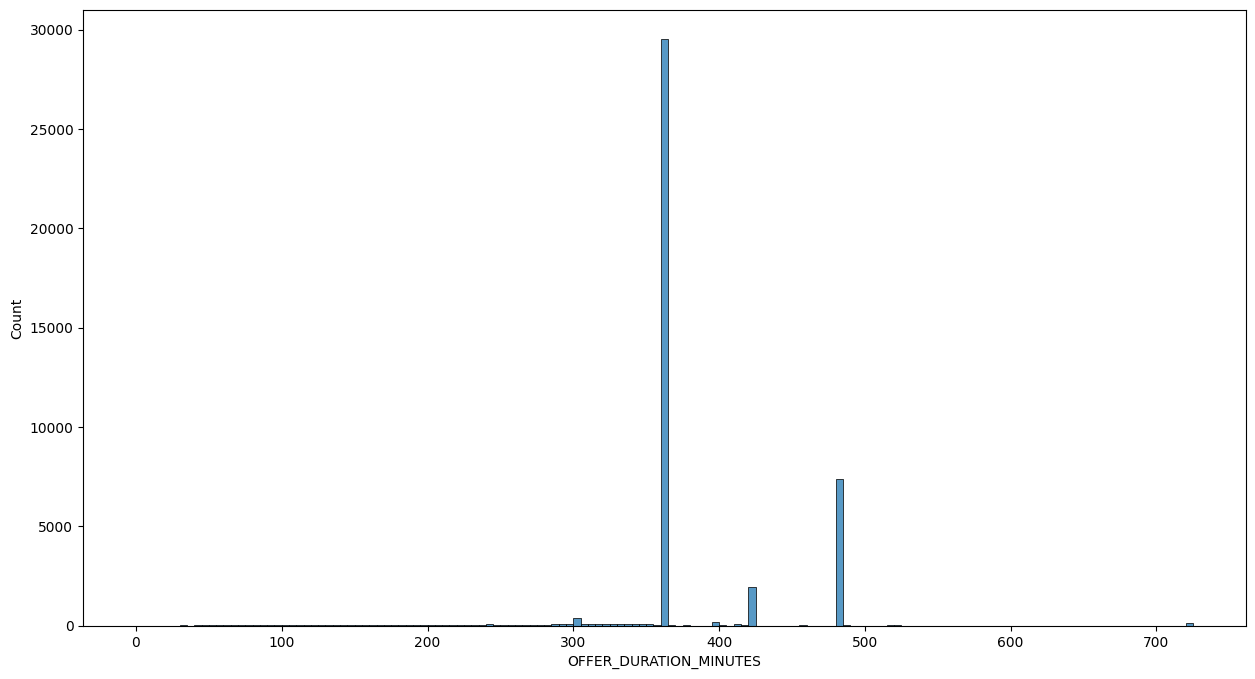

In [372]:
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(ax=ax, data=data, x="OFFER_DURATION_MINUTES", binwidth=5, binrange=(0,722))

##### Observation 6
Lightning deals durantion ranges from 0 minutes to 104 hours (> 4.3 days) with most cases falling in the range 6-8 hours. Durantions

In [354]:
display(data[data["OFFER_DURATION_MINUTES"] == 0])

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,OFFER_DURATION_MINUTES,OFFER_DURATION_HOURS,OFFER_START_WEEKDAY,OFFER_START_MONTH,OFFER_START_DAY,OFFER_START_YEAR
18,2021-06-22,2021-06-22 19:00:00,2021-06-22 19:00:03,lightning_deal,10,10,0.0,0.0,None,free_shipping,PARTY,T & B,MLM-PARTY_SUPPLIES,0.0,0.0,1,6,22,2021
25,2021-06-22,2021-06-22 13:00:00,2021-06-22 13:00:00,lightning_deal,5,5,0.0,0.0,None,free_shipping,TOOLS AND CONSTRUCTION,HOME & INDUSTRY,MLM-SHOWER_HEADS,0.0,0.0,1,6,22,2021
72,2021-06-22,2021-06-22 07:00:00,2021-06-22 07:00:00,lightning_deal,5,5,0.0,0.0,None,free_shipping,"BOOKS, MULTIMEDIA & OTHER E!",ENTERTAINMENT,MLM-BOOKS,0.0,0.0,1,6,22,2021
90,2021-06-22,2021-06-22 16:00:00,2021-06-22 16:00:00,lightning_deal,3,3,0.0,0.0,A,free_shipping,PETS FOOD,CPG,MLM-CATS_AND_DOGS_FOODS,0.0,0.0,1,6,22,2021
98,2021-06-22,2021-06-22 16:00:00,2021-06-22 16:00:00,lightning_deal,3,3,0.0,0.0,A,free_shipping,PETS FOOD,CPG,MLM-CATS_AND_DOGS_FOODS,0.0,0.0,1,6,22,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48646,2021-06-19,2021-06-19 13:00:00,2021-06-19 13:00:00,lightning_deal,8,8,0.0,0.0,None,None,APPAREL,APP & SPORTS,MLM-UNDERPANTS,0.0,0.0,5,6,19,2021
48647,2021-06-19,2021-06-19 19:00:00,2021-06-19 19:00:00,lightning_deal,5,5,0.0,0.0,None,free_shipping,APPAREL,APP & SPORTS,MLM-UNDERPANTS,0.0,0.0,5,6,19,2021
48700,2021-06-19,2021-06-19 07:00:00,2021-06-19 07:00:00,lightning_deal,10,10,0.0,0.0,None,None,ELECTRONICS,CE,MLM-PLAGUES_ULTRASONIC_REPELLENTS,0.0,0.0,5,6,19,2021
48709,2021-06-19,2021-06-19 07:00:00,2021-06-19 07:00:00,lightning_deal,5,5,0.0,0.0,None,None,HOME&DECOR,HOME & INDUSTRY,MLM-PILLOWS,0.0,0.0,5,6,19,2021


##### Observation 7
Around 7% of rows have a deal duration of zero minutes. This needs to be checked with the client, but will be removed for the present analysis. 

In [357]:
data.drop(index=data[data["OFFER_DURATION_MINUTES"] == 0].index, inplace=True)

In [365]:
print("Duration < 15 min")
display(data.loc[
    (data["OFFER_DURATION_MINUTES"] > 0)
    & (data["OFFER_DURATION_MINUTES"] < 15)
    ])

Duration < 15 min


,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID,OFFER_DURATION_MINUTES,OFFER_DURATION_HOURS,OFFER_START_WEEKDAY,OFFER_START_MONTH,OFFER_START_DAY,OFFER_START_YEAR


##### Observation 7
What is the minimum deal duration? having a deal for too few minutes doesn't seem to make sense, and entries in the dataset with such low durations could be an error in the data. For the present analysis, durations less than 15 minutes will be removed (~0.1% total rows).

In [364]:
data.drop(index=data[data["OFFER_DURATION_MINUTES"] < 15].index, inplace=True)

##### Distribution of sales among weekdays and day hours

##### Distribution of sales among product categories

##### Effect of shipping payment type